<a href="https://colab.research.google.com/github/subham129/Face-Mask-Detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:08<00:00, 22.2MB/s]
100% 163M/163M [00:08<00:00, 19.7MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2315.jpg', 'with_mask_2566.jpg', 'with_mask_1311.jpg', 'with_mask_2116.jpg', 'with_mask_1585.jpg']
['with_mask_3408.jpg', 'with_mask_2613.jpg', 'with_mask_1110.jpg', 'with_mask_1200.jpg', 'with_mask_248.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1205.jpg', 'without_mask_2036.jpg', 'without_mask_2570.jpg', 'without_mask_631.jpg', 'without_mask_1772.jpg']
['without_mask_181.jpg', 'without_mask_1976.jpg', 'without_mask_2676.jpg', 'without_mask_653.jpg', 'without_mask_2244.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [9]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels

In [13]:
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


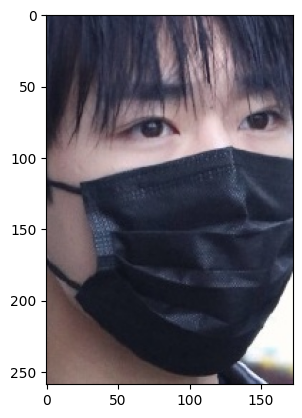

In [14]:
img = mpimg.imread('/content/data/with_mask/with_mask_1540.jpg')
imgplot = plt.imshow(img)
plt.show()

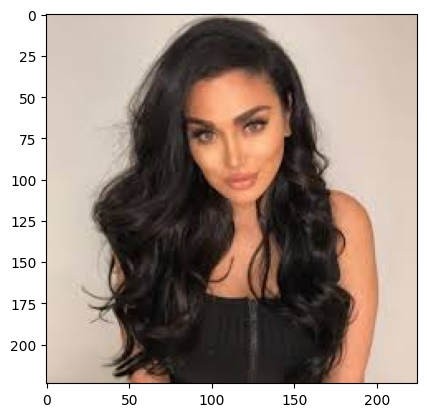

In [15]:
img = mpimg.imread('/content/data/without_mask/without_mask_2920.jpg')
imgplot = plt.imshow(img)
plt.show()

In [16]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [44]:
without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [18]:
type(data)

list

In [19]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
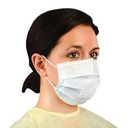

In [20]:
data[0]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
X = np.array(data)
Y = np.array(labels)

In [24]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[221, 232, 226],
        [223, 232, 225],
        [214, 220, 211],
        ...,
        [164, 144, 119],
        [161, 141, 116],
        [161, 141, 116]],

       [[227, 238, 232],
        [220, 230, 222],
        [203, 209, 201],
        ...,
        [166, 145, 121],
        [163, 143, 118],
        [163, 143, 118]],

       [[228, 239, 233],
        [214, 224, 216],
        [192, 199, 187],
        ...,
        [166, 144, 120],
        [162, 142, 117],
        [162, 142, 117]],

       ...,

       [[ 85,  47,  34],
        [ 76,  41,  26],
        [ 65,  34,  19],
        ...,
        [156, 103,  72],
        [158, 105,  74],
        [163, 110,  79]],

       [[ 93,  54,  41],
        [ 82,  46,  32],
        [ 69,  38,  22],
        ...,
        [160, 109,  78],
        [161, 110,  79],
        [163, 112,  81]],

       [[105,  64,  49],
        [ 91,  55,  39],
        [ 76,  45,  29],
        ...,
        [163, 114,  84],
        [164, 115,  85],
        [163, 114,  84]]], dtype=uint8)
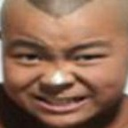

In [51]:
X_train[82]

In [28]:
X_train_scaled[0]

array([[[0.00784314, 0.70980392, 0.87843137],
        [0.00784314, 0.70980392, 0.87843137],
        [0.00784314, 0.70980392, 0.87843137],
        ...,
        [0.44705882, 0.83137255, 0.94509804],
        [0.44313725, 0.82745098, 0.94117647],
        [0.43921569, 0.82352941, 0.9372549 ]],

       [[0.00784314, 0.70980392, 0.87843137],
        [0.00784314, 0.70980392, 0.87843137],
        [0.00784314, 0.70980392, 0.87843137],
        ...,
        [0.44313725, 0.82745098, 0.94117647],
        [0.43921569, 0.82352941, 0.9372549 ],
        [0.43921569, 0.82352941, 0.9372549 ]],

       [[0.00784314, 0.70980392, 0.87843137],
        [0.00784314, 0.70980392, 0.87843137],
        [0.00784314, 0.70980392, 0.87843137],
        ...,
        [0.44313725, 0.82745098, 0.94509804],
        [0.43921569, 0.81960784, 0.94117647],
        [0.43921569, 0.82352941, 0.94117647]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [29]:
import tensorflow as tf
from tensorflow import keras

In [59]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [67]:
history = model.fit(X_train_scaled, Y_train, epochs=10)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - acc: 0.9654 - loss: 0.1028
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9710 - loss: 0.0784
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9834 - loss: 0.0522
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9764 - loss: 0.0619
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9873 - loss: 0.0370
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9815 - loss: 0.0440
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - acc: 0.9876 - loss: 0.0323
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - acc: 0.9803 - loss: 0.0570
Epoch 9/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9831 - loss: 0.0429
Epoch 10/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9861 - loss: 0.0430


In [68]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.9470 - loss: 0.1983
Test Accuracy = 0.9457312822341919


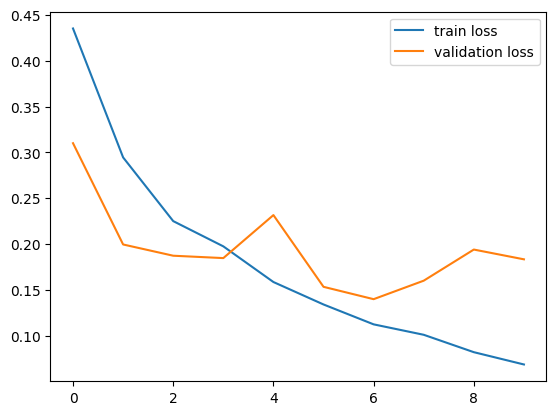

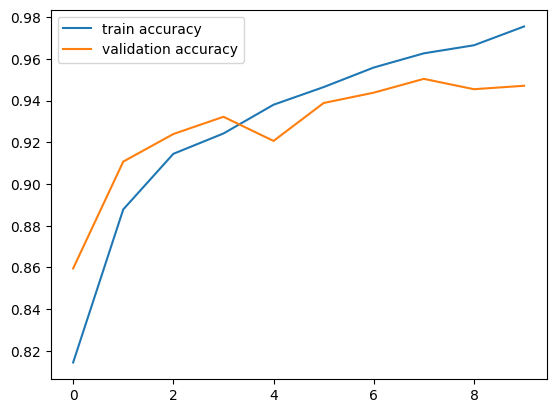

In [63]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/WIN_20240811_23_23_01_Pro.jpg


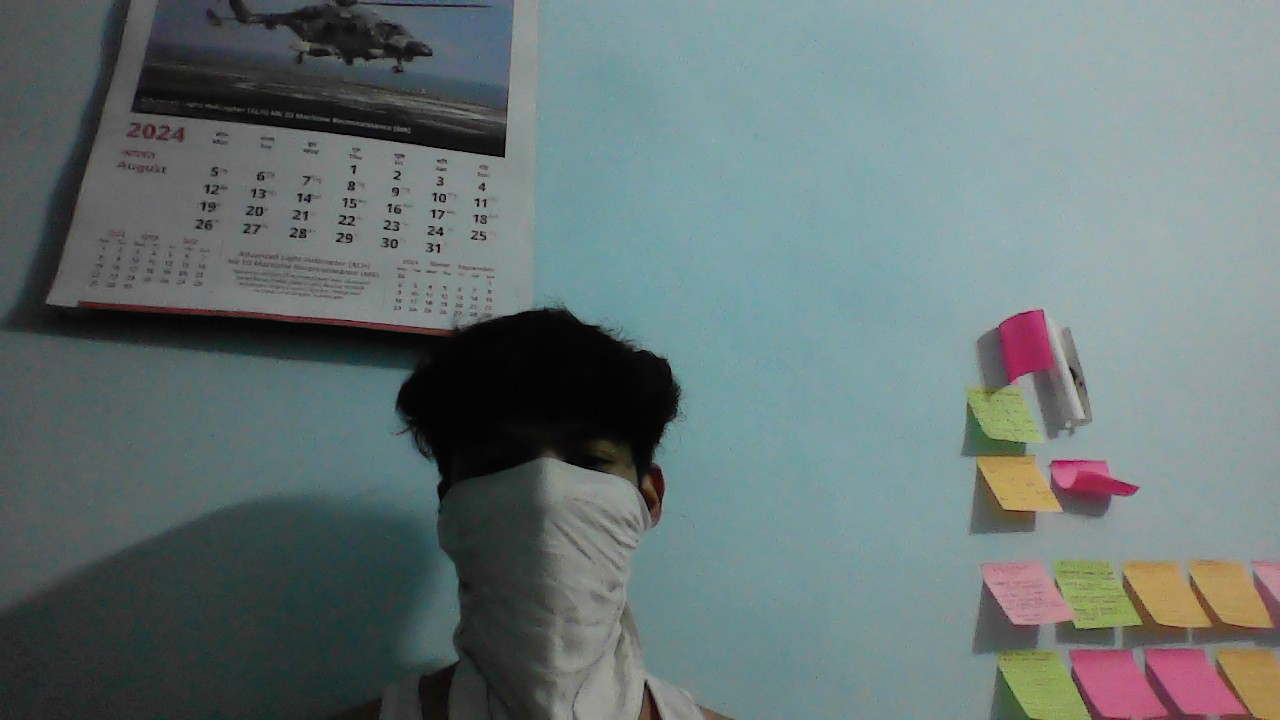

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.5651213  0.43646982]]
0
The person in the image is wearing a mask


In [75]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/WIN_20240811_23_04_25_Pro.jpg


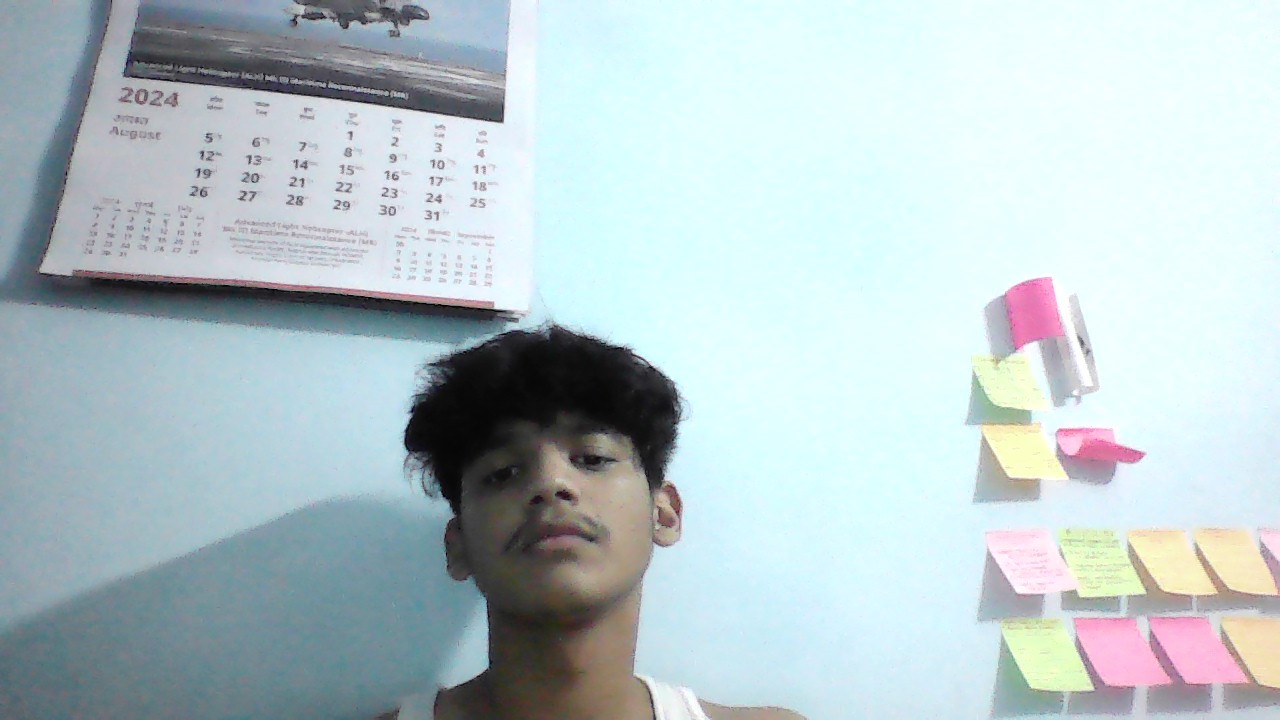

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.24838714 0.8487753 ]]
1
The person in the image is not wearing a mask


In [76]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')